In [1]:
import os
os.environ["CEA_USE_SITE_PACKAGES"] = '1'
from CEA_Wrap import Fuel, Oxidizer, RocketProblem

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import bar_to_psi

In [2]:
ethanol = Fuel("C3H8O,2propanol", temp=298)
n2o = Oxidizer("N2O", temp=298)

In [3]:
results = []
for _sup in np.arange(1, 3.1, 0.1):
    for _phi in np.arange(0.1, 2, 0.1):
        problem = RocketProblem(
            pressure=bar_to_psi(20),
            materials=[ethanol, n2o],
            phi=_phi,
            sup=_sup,
        )
        results.append({**problem.run(), 'sup': _sup})

In [4]:
len(results)

399

In [5]:
df = pd.DataFrame(results)

In [6]:
df_pivot = df.pivot(index='sup', columns='phi', values='isp')

In [7]:
X, Y = np.meshgrid(df_pivot.columns, df_pivot.index)
Z = df_pivot.to_numpy().reshape(len(df['sup'].unique()), len(df['phi'].unique()))

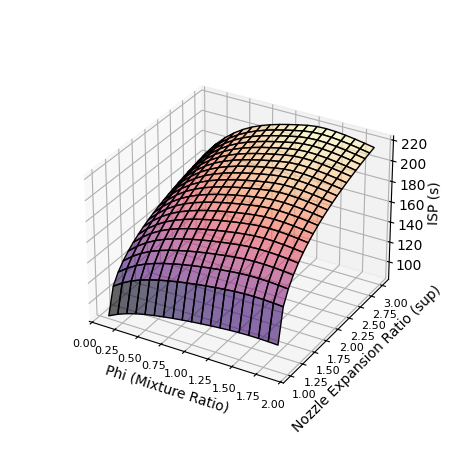

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.surf = ax.plot_surface(X, Y, Z, cmap='magma', edgecolor='k', alpha=0.6)

ax.view_init(elev=30)
ax.set_xlabel('Phi (Mixture Ratio)')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

fig.tight_layout()
ax.set_ylabel('Nozzle Expansion Ratio (sup)')
ax.set_zlabel('ISP (s)')

ax._dist = 13

plt.show()

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(
    x=X, y=Y, z=Z,
    colorscale='magma',
    colorbar=dict(title='ISP (s)'),
    hovertemplate='Phi: %{x}<br>Sup: %{y}<br>ISP: %{z:.2f}<extra></extra>'
)])

fig.update_layout(
    title='ISP vs Mixture Ratio and Nozzle Expansion',
    scene=dict(
        xaxis_title='Phi (Mixture Ratio)',
        yaxis_title='Nozzle Expansion Ratio (sup)',
        zaxis_title='ISP (s)',
        xaxis=dict(tickfont=dict(size=8)),
        yaxis=dict(tickfont=dict(size=8)),
        zaxis=dict(tickfont=dict(size=8)),
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()